In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# perform na detection
# duplicates or not
# outliers or not
# correlation
# Scaling required or not
# Label encoding needed or not

In [6]:
# correlation using ANOVA
from scipy.stats import f_oneway

In [7]:
def checkAnova(categ_col, num_col, df):
  p = f_oneway(*df.groupby(categ_col)[num_col].apply(list))[1]

  if p>0.05 : print( "Accept H0, no relation")
  if p<0.05 : print("Failed to accept H0, there is relation")



In [8]:
checkAnova('species','petal_length', df)
checkAnova('species','petal_width',df)
checkAnova('species','sepal_length',df)
checkAnova('species','petal_width',df)

Failed to accept H0, there is relation
Failed to accept H0, there is relation
Failed to accept H0, there is relation
Failed to accept H0, there is relation


In [9]:
# OR in smart way
for i in df.columns:
  if df[i].dtype=='float64' or df[i].dtype=='int64':
    checkAnova('species',i, df)

Failed to accept H0, there is relation
Failed to accept H0, there is relation
Failed to accept H0, there is relation
Failed to accept H0, there is relation


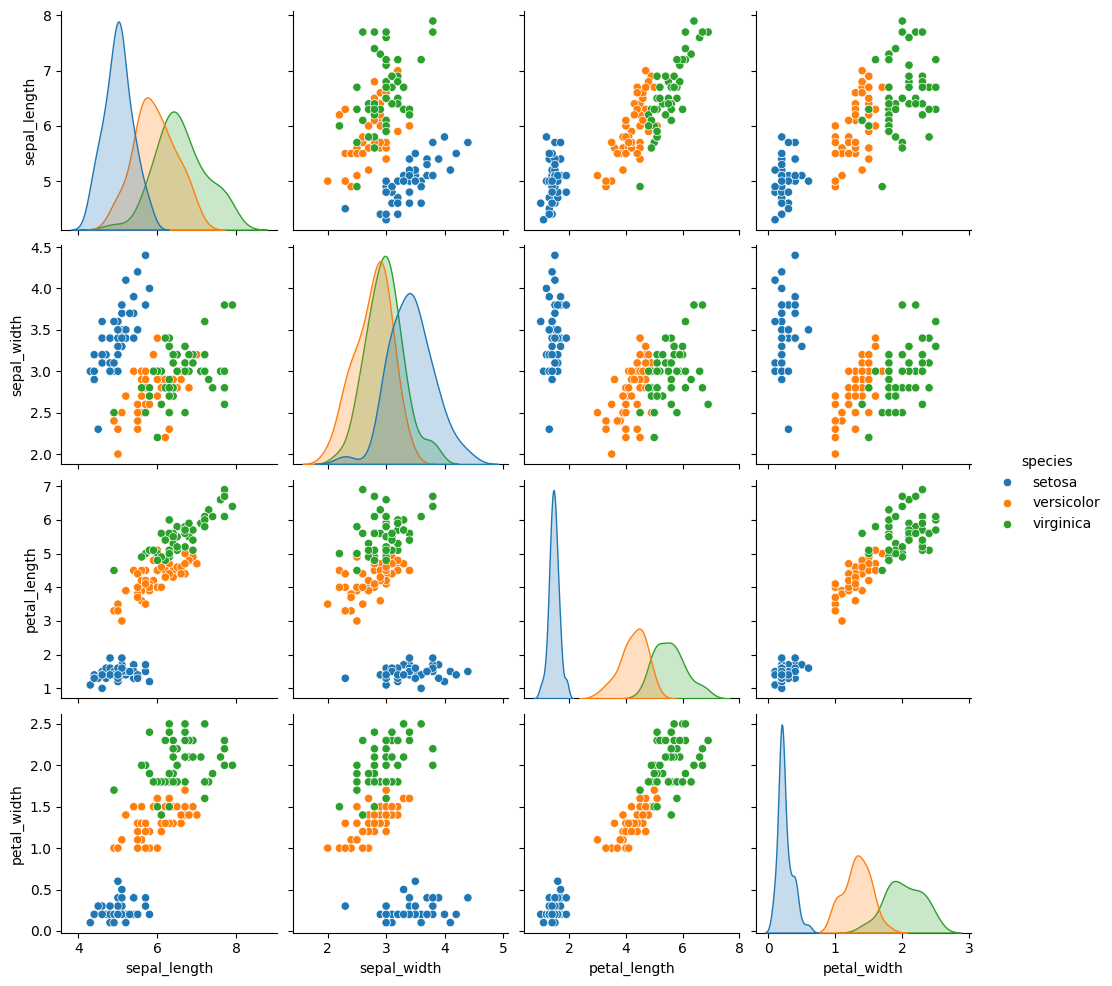

In [10]:
sns.pairplot(df, hue='species')

<Axes: xlabel='species', ylabel='petal_length'>

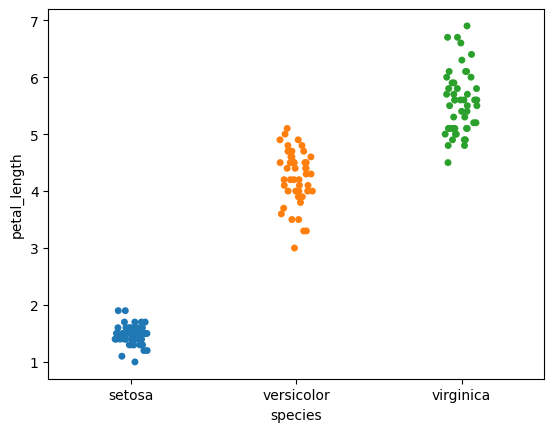

In [11]:
sns.stripplot(data=df,x='species',y='petal_length',hue='species',jitter=True)

In [12]:
# here petal length of versicolor and virginnica are overlapping,
# if we give only petal length to the model as a feature,
# it'll be confused in those 2 species
# so we have to take all features for training

In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,[-1]]


print(x.shape,y.shape, type(x), type(y))

(150, 4) (150, 1) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)


In [16]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, \
ConfusionMatrixDisplay, accuracy_score

In [18]:
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain).score(xtest,ytest)

1.0

In [19]:
yhat = model.predict(xtest)
accuracy_score(ytest,yhat)

1.0

In [20]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
cm = confusion_matrix(ytest,yhat)  ; cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

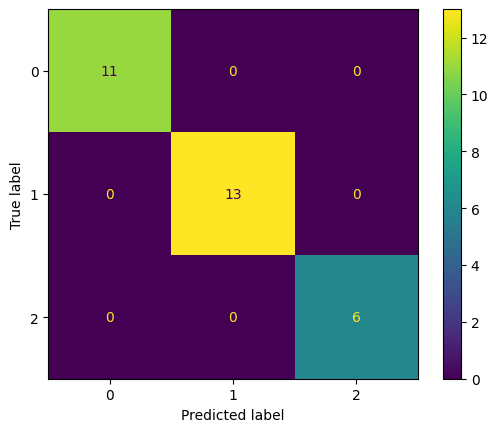

In [22]:
ConfusionMatrixDisplay(cm).plot()

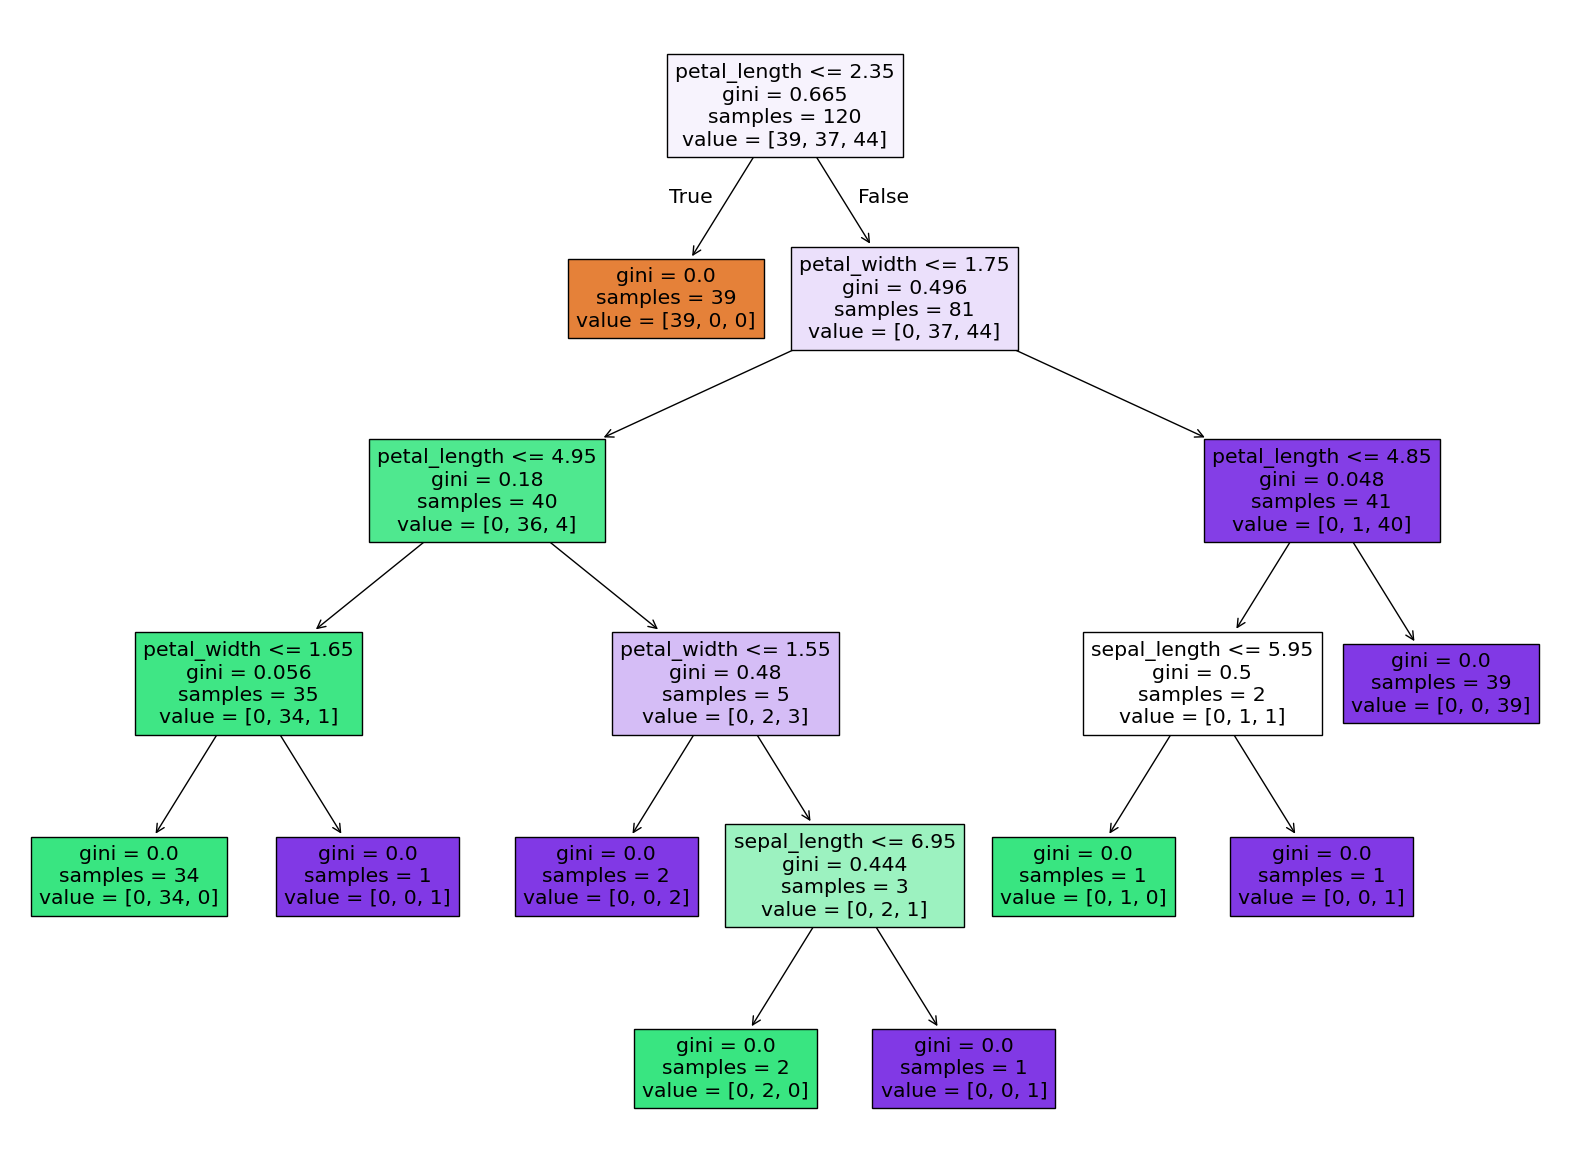

In [28]:
from sklearn import tree

features = df.columns[:-1]

plt.figure(figsize=(20,15))
tree.plot_tree(model, feature_names=features, filled=True);

In [30]:
# here,in first node, gini=0.665 came using gini impurity formula

# i.e. value=[39,37,44] are the classes ('species') -> (setosa,versicolor, virginca)...alphabetically
# samples = 120 is total number

# gini = 1 - ((39/120)**2 + (37/120)**2 + (44/120)**2

# less the gini, best the class.